<h1>Capstone Project - The Battle of the Neighborhoods - Toronto<h1>
    <h2>Applied Data Science Capstone by IBM/Coursera<h2>   

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37hafa7651_0
  - defaults/noarch::ibm-wsrt-py37main-main==custom=2020
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=2020
done

# All requested packages already installed.



In [6]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37hafa7651_0
  - defaults/noarch::ibm-wsrt-py37main-main==custom=2020
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=2020
done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    -

## Introduction: Business Problem <a name="introduction"></a>

The battel of the neighborhood is an important data science project targeting the clusters of similar types to provide a user to exploit this as a tool for an ample number of business choices. This project is based on the application of different data science techniques learned in the entire course.

## Data <a name="data"></a>

Based on the problem statement:

- Following data sources will be needed to extract/generate the required information:https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
- Centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using Geocoder
- Number of restaurants and their type and location in every neighborhood will be obtained using Foursquare API
- coordinate of Toronto center will be obtained using Geocoder of well known Toronto location
- The data frame will consist of three columns: PostalCode, Borough, and Neighborhood
- Needs to process only those cells that have an assigned Borough. Ignore cells with a Borough that is Not assigned.
- More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, one can see that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
- If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the Borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
- Needs to clean the data using appropriate methods. 

## Methodology <a name="methodology"></a>

<h3>Download and Explore Dataset<h>

Webscraping to Extract Postal Codes of Toronto

Parse the html data using beautiful_soup

In [7]:
source = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
soup = BeautifulSoup(source, "html5lib")

In [8]:
table = soup.find('table')

After retreiving the URL and creating a Beautiful soup object

Firstly create a list

Later after finding the table and table data  create a dictionary called cell having 3 keys PostalCode, Borough and Neighborhood.

As postal code contains upto 3 characters extract that using tablerow.p.text

Next use split ,strip and replace functions for getting Borough and Neighborhood information.

Append to the list 

In [89]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['Postal Code'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

        # print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df.head(104)

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [10]:
df.shape

(103, 3)

Use a link to a csv file that has the geographical coordinates of each postal code

In [11]:
df1 = pd.read_csv ('https://cocl.us/Geospatial_data')
df1

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


Merge two datasets (df and df1) based on Postal code

In [12]:
df2 = pd.merge(df, df1, on='Postal Code')
df2.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


## Analysis <a name="analysis"></a>

Lets see how many neighbouhoods in each borough

In [26]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [31]:
df3= df2.groupby('Borough').count()

Text(0, 0.5, '# Neighborhoods')

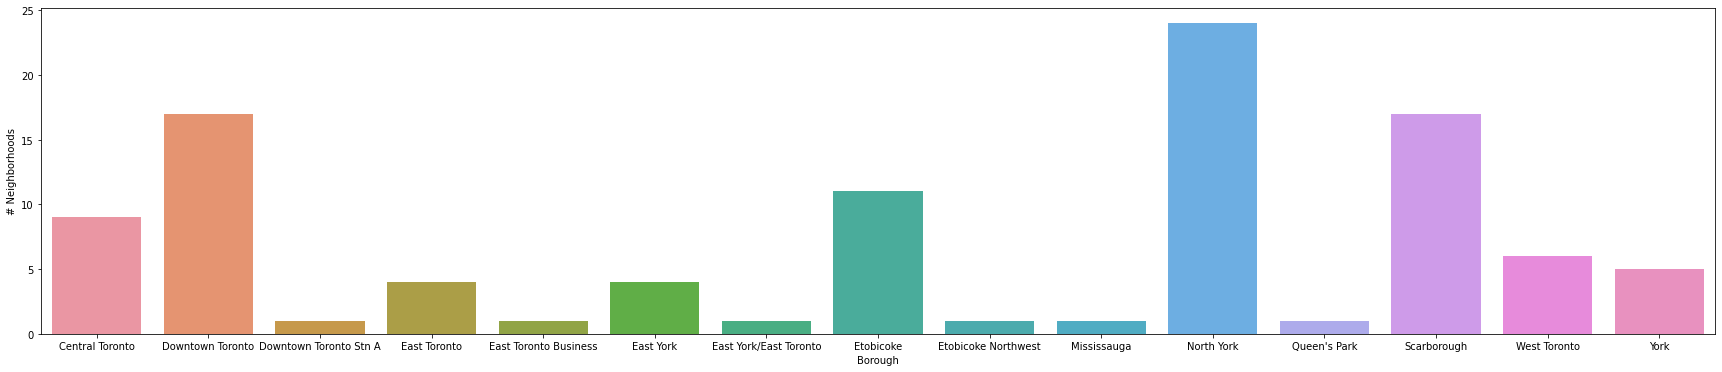

In [32]:
# Set the width and height of the figure
plt.figure(figsize=(30,6))

sns.barplot(x=df3.index, y=df3['Neighborhood'])

# Add label for vertical axis
plt.ylabel("# Neighborhoods")

<b>We choose Toronto Downtown borough for neighborhoods analysis<b>

 Let's slice the original dataframe and create a new dataframe of the Downtown Toronto.

In [34]:
Downtown_data = df2[df2['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
Downtown_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
4,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383


Use geopy library to get the latitude and longitude values of Downtown Toronto

In [93]:
address = 'Downtown Toronto'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6541737, -79.38081164513409.


Let's visualize Downtown Toronto the neighborhoods in it.

In [94]:
# create map of Downtown Toronto using latitude and longitude values
map_downtown = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
locations = Downtown_data[['Latitude', 'Longitude']]
locationlist = locations.astype(float).values.tolist()

map_downtown = folium.Map(location=[43.6541737, -79.38081164513409], zoom_start=10)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=Downtown_data['Neighborhood'][point]).add_to(map_downtown)
map_downtown

<h3> 1. Explore Neighborhoods in Downtown Toronto<h3>

We are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

### Define Foursquare Credentials and Version

##### Make sure that you have created a Foursquare developer account and have your credentials handy

##### To obtain access token follow these steps.

<br>

1.  Go to your **"App Settings"** page on the developer console of Foursquare.com   
2.  Set the **"Redirect URL"** under **"Web Addresses"** to [https://www.google.com](https://www.google.com?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)  


3.  Paste and enter the following url in your web browser **(replace YOUR_CLIENT_ID with your actual client id)**:  
    [https://foursquare.com/oauth2/authenticate?client_id=YOUR_CLIENT_ID&response_type=code&redirect_uri=https://www.google.com](https://foursquare.com/oauth2/authenticate?client_id=YOUR_CLIENT_ID&response_type=code&redirect_uri=https://www.google.com&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) 

    This should redirect you to a google page requesting permission to make the connection. 
4.  Accept and then look at the url of your web browser **(take note at the CODE part of the url to use in step 5)**  
    It should look like [https://www.google.com/?code=CODE](https://www.google.com?code=CODE&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)  
5.  Copy the code value from the previous step.  
       Paste and enter the following into your web browser **(replace placeholders with actual values)**:  
    [https://foursquare.com/oauth2/access_token?client_id=YOUR_CLIENT_ID&client_secret=YOUR_CLIENT_SECRET&grant_type=authorization_code&redirect_uri=https://www.google.com&code=CODE](https://foursquare.com/oauth2/access_token?client_id=YOUR_CLIENT_ID&client_secret=YOUR_CLIENT_SECRET&grant_type=authorization_code&redirect_uri=https://www.google.com&code=CODE&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork-21253531&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).  
6.  When you paste the link , This should lead you to a page that gives you your **access token**.



In [37]:
CLIENT_ID = 'UPR0W3TF11EDJ40A1SI41GSJ1ALBGGAMADUFXFB22CGJMJJK' # your Foursquare ID
CLIENT_SECRET = '0WDT12HOHT2AM0ZNM23PGKRJPRLBEUUAVCAI2CGF4LNX1MOL' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version
ACCESS_TOKEN = 'ADA44SZQAXVEN2COKKH5JSS3FCLJWQYJQWZUDXJE55O5X3N2' 
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UPR0W3TF11EDJ40A1SI41GSJ1ALBGGAMADUFXFB22CGJMJJK
CLIENT_SECRET:0WDT12HOHT2AM0ZNM23PGKRJPRLBEUUAVCAI2CGF4LNX1MOL


Let's get venues that are in Downtown Toronto within a radius of 500 meters.

In [38]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [39]:
downtown_venues = getNearbyVenues(names=Downtown_data['Neighborhood'],
                                   latitudes=Downtown_data['Latitude'],
                                   longitudes=Downtown_data['Longitude']
                                  )

Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


Let's check the size of the resulting dataframe

In [40]:
print(downtown_venues.shape)
downtown_venues.head()

(1092, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
1,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


Let's check how many venues were returned for each neighborhood

In [41]:
downtown_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,59,59,59,59,59,59
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,66,66,66,66,66,66
Christie,16,16,16,16,16,16
Church and Wellesley,73,73,73,73,73,73
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


In [95]:
df4= downtown_venues.groupby('Neighborhood').count()

Text(0, 0.5, 'Venues count')

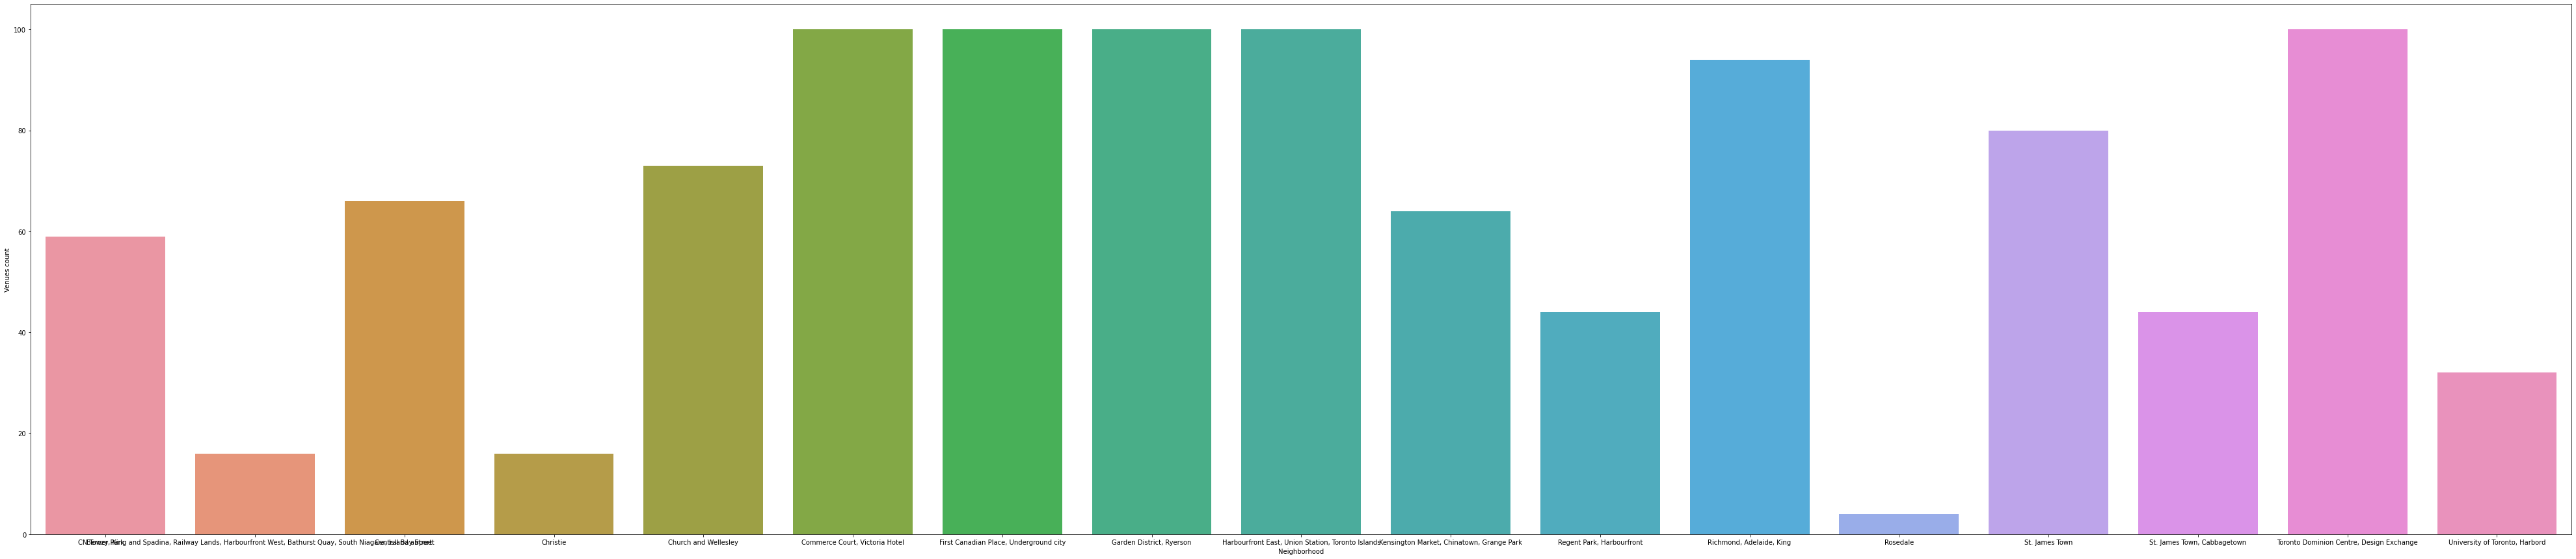

In [102]:
# Set the width and height of the figure
plt.figure(figsize=(70,15))

sns.barplot(x=df4.index, y=df4['Venue'])

# Add label for vertical axis
plt.ylabel("Venues count")

Let's find out how many unique categories can be curated from all the returned venues

In [42]:
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))

There are 204 uniques categories.


<h3>2. Analyze Each Neighborhood<h3>

In [43]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]

downtown_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

And let's examine the new dataframe size.

In [44]:
downtown_onehot.shape

(1092, 204)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [45]:
downtown_grouped = downtown_onehot.groupby('Neighborhood').mean().reset_index()
downtown_grouped.head()

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Berczy Park,0.000000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.0,0.0,0.016949,0.000000,0.0,0.0,0.0000,0.0,0.0000,0.016949,0.050847,0.000000,0.0,0.0,0.016949,0.016949,0.0,0.033898,0.0,0.016949,0.016949,0.0000,0.000000,0.0000,0.0,0.016949,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.016949,0.0000,0.000000,0.033898,0.000000,0.0,0.016949,0.050847,0.067797,0.0,0.0,0.0,0.0,0.016949,0.000000,0.016949,0.0,0.0,0.016949,0.0,0.000000,0.0,0.016949,0.0,0.016949,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.016949,0.0,0.000000,0.000000,0.0,0.000000,0.033898,0.000000,0.0,0.016949,0.000000,0.0,0.0,0.016949,0.016949,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.016949,0.0,0.000000,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.016949,0.0,0.0,0.000000,0.016949,0.0,0.016949,0.000000,0.016949,0.016949,0.0,0.000000,0.000000,0.0,0.0,0.0,0.016949,0.016949,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.016949,0.0,0.0,0.016949,0.0,0.000000,0.0,0.0,0.0,0.016949,0.0,0.0,0.033898,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.016949,0.000000,0.0,0.0000,0.033898,0.0,0.0

Let's confirm the new size

In [46]:
downtown_grouped.shape

(17, 204)

Let's print each neighborhood along with the top 5 most common venues

In [47]:
num_top_venues = 5

for hood in downtown_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = downtown_grouped[downtown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
          venue  freq
0   Coffee Shop  0.07
1  Cocktail Bar  0.05
2        Bakery  0.05
3      Beer Bar  0.03
4    Restaurant  0.03


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.19
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3     Boat or Ferry  0.06
4           Airport  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.17
1      Sandwich Place  0.08
2  Italian Restaurant  0.05
3                Café  0.05
4     Bubble Tea Shop  0.03


----Christie----
           venue  freq
0  Grocery Store  0.25
1           Café  0.19
2           Park  0.12
3    Coffee Shop  0.06
4      Nightclub  0.06


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.08
1  Japanese Restaurant  0.07
2     Sushi Restaurant  0.07
3           Restaurant  0.04
4                Hotel  0.03


----Commerce C

Let's put that into a pandas dataframe

In [48]:
#First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [50]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Restaurant,Cheese Shop,Seafood Restaurant,Pharmacy,Farmers Market,Diner
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Boat or Ferry,Airport,Boutique,Plane,Sculpture Garden,Rental Car Location,Coffee Shop
2,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Bubble Tea Shop,Salad Place,Restaurant,Thai Restaurant,Burger Joint,Department Store
3,Christie,Grocery Store,Café,Park,Coffee Shop,Nightclub,Baby Store,Athletics & Sports,Restaurant,Italian Restaurant,Candy Store
4,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Hotel,Mediterranean Restaurant,Men's Store,Grocery Store,Gay Bar,Pub
5,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Hotel,Café,Italian Restaurant,Gym,Japanese Restaurant,Seafood Restaurant,Deli / Bodega,American Restaurant
6,"First Canadian Place, Underground city",Coffee Shop,Café,Hotel,Japanese Restaurant,Gym,Restaurant,Seafood Restaurant,American Restaurant,Salad Place,Deli / Bodega
7,"Garden District, Ryerson",Clothing Store,Coffee Shop,Middle Eastern Restaurant,Cosmetics Shop,Café,Bubble Tea Shop,Ramen Restaurant,Burger Joint,Diner,Bookstore
8,"Harbourfront East, Union Station, Toronto Islands",Coffee Shop,Aquarium,Café,Hotel,Fried Chicken Joint,Restaurant,Scenic Lookout,Brewery,Sporting Goods Shop,Italian Restaurant
9,"Kensington Market, Chinatown, Grange Park",Café,Coffee Shop,Vietnamese Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Bakery,Gaming Cafe,Park,Farmers Market,Bar


<h2>4. Cluster Neighborhoods<h2>

In [51]:
pip install --user --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


Run k-means to cluster the neighborhood into 5 clusters.

In [132]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

downtown_grouped_clustering = downtown_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 2, 1, 1, 1, 1, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [137]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster#', kmeans.labels_)# uncomment this line during first run. Later comment it back, otherwise it will give an error that inserted columns name already exist
downtown_merged = Downtown_data
# merge downtown_grouped with downtown_data to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
#downtown_merged=downtown_merged.drop(['Cluster','cluster','cluster#'], axis=1, inplace=True)
downtown_merged

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster#,cluster#,cluster,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,0,4,1,Coffee Shop,Pub,Park,Bakery,Breakfast Spot,Theater,Café,Restaurant,Event Space,Chocolate Shop
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,0,3,1,Clothing Store,Coffee Shop,Middle Eastern Restaurant,Cosmetics Shop,Café,Bubble Tea Shop,Ramen Restaurant,Burger Joint,Diner,Bookstore
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,0,3,1,Coffee Shop,Café,Cosmetics Shop,Cocktail Bar,Department Store,Farmers Market,Moroccan Restaurant,Beer Bar,Seafood Restaurant,Hotel
3,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,0,3,1,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Restaurant,Cheese Shop,Seafood Restaurant,Pharmacy,Farmers Market,Diner
4,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,1,0,0,1,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Bubble Tea Shop,Salad Place,Restaurant,Thai Restaurant,Burger Joint,Department Store
5,M6G,Downtown Toronto,Christie,43.669542,-79.422564,2,2,2,2,Grocery Store,Café,Park,Coffee Shop,Nightclub,Baby Store,Athletics & Sports,Restaurant,Italian Restaurant,Candy Store
6,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,1,0,0,1,Coffee Shop,Café,Restaurant,Clothing Store,Gym,Thai Restaurant,Deli / Bodega,Salad Place,Pizza Place,Steakhouse
7,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,1,0,0,1,Coffee Shop,Aquarium,Café,Hotel,Fried Chicken Joint,Restaurant,Scenic Lookout,Brewery,Sporting Goods Shop,Italian Restaurant
8,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,1,0,0,1,Coffee Shop,Hotel,Café,Japanese Restaurant,Italian Restaurant,Seafood Restaurant,Restaurant,Salad Place,Concert Hall,Sushi Restaurant
9,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,1,0,0,1,Coffee Shop,Restaurant,Hotel,Café,Italian Restaurant,Gym,Japanese Restaurant,Seafood Restaurant,Deli / Bodega,American Restaurant


Finally, let's visualize the resulting clusters

In [138]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['Latitude'], downtown_merged['Longitude'], downtown_merged['Neighborhood'], downtown_merged['Cluster#']):
    label = folium.Popup(str(poi) + ' Cluster#' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h2>5. Examine Clusters<h2>

Examine each cluster and determine the discriminating venue categories that distinguish each cluster.

Cluster 0

In [145]:
downtown_merged.loc[downtown_merged['Cluster#'] == 0, downtown_merged.columns[[1] + list(range(2, downtown_merged.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Cluster#,cluster#,cluster,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.39442,0,4,6,0,Airport Service,Airport Lounge,Airport Terminal,Boat or Ferry,Airport,Boutique,Plane,Sculpture Garden,Rental Car Location,Coffee Shop


Cluster 1

In [146]:
downtown_merged.loc[downtown_merged['Cluster#'] == 1, downtown_merged.columns[[1] + list(range(2, downtown_merged.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Cluster#,cluster#,cluster,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,0,4,1,Coffee Shop,Pub,Park,Bakery,Breakfast Spot,Theater,Café,Restaurant,Event Space,Chocolate Shop
1,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,0,3,1,Clothing Store,Coffee Shop,Middle Eastern Restaurant,Cosmetics Shop,Café,Bubble Tea Shop,Ramen Restaurant,Burger Joint,Diner,Bookstore
2,Downtown Toronto,St. James Town,43.651494,-79.375418,1,0,3,1,Coffee Shop,Café,Cosmetics Shop,Cocktail Bar,Department Store,Farmers Market,Moroccan Restaurant,Beer Bar,Seafood Restaurant,Hotel
3,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,0,3,1,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Restaurant,Cheese Shop,Seafood Restaurant,Pharmacy,Farmers Market,Diner
4,Downtown Toronto,Central Bay Street,43.657952,-79.387383,1,0,0,1,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Bubble Tea Shop,Salad Place,Restaurant,Thai Restaurant,Burger Joint,Department Store
6,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,1,0,0,1,Coffee Shop,Café,Restaurant,Clothing Store,Gym,Thai Restaurant,Deli / Bodega,Salad Place,Pizza Place,Steakhouse
7,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,1,0,0,1,Coffee Shop,Aquarium,Café,Hotel,Fried Chicken Joint,Restaurant,Scenic Lookout,Brewery,Sporting Goods Shop,Italian Restaurant
8,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,1,0,0,1,Coffee Shop,Hotel,Café,Japanese Restaurant,Italian Restaurant,Seafood Restaurant,Restaurant,Salad Place,Concert Hall,Sushi Restaurant
9,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,1,0,0,1,Coffee Shop,Restaurant,Hotel,Café,Italian Restaurant,Gym,Japanese Restaurant,Seafood Restaurant,Deli / Bodega,American Restaurant
10,Downtown Toronto,"University of Toronto, Harbord",43.662696,-79.400049,1,3,5,1,Café,Bookstore,Italian Restaurant,Japanese Restaurant,Bar,Bakery,Restaurant,French Restaurant,Dessert Shop,Sandwich Place


Cluster 2

In [147]:
downtown_merged.loc[downtown_merged['Cluster#'] == 2, downtown_merged.columns[[1] + list(range(2, downtown_merged.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Cluster#,cluster#,cluster,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Downtown Toronto,Christie,43.669542,-79.422564,2,2,2,2,Grocery Store,Café,Park,Coffee Shop,Nightclub,Baby Store,Athletics & Sports,Restaurant,Italian Restaurant,Candy Store


Cluster 3

In [149]:
downtown_merged.loc[downtown_merged['Cluster#'] == 3, downtown_merged.columns[[1] + list(range(2, downtown_merged.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Cluster#,cluster#,cluster,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Downtown Toronto,Rosedale,43.679563,-79.377529,3,1,1,3,Park,Playground,Trail,Music Venue,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant


## Results and Discussion <a name="results"></a>

The battel of a neighborhood project explored different categories of venues. In this analysis, initially, a sum of 103 unique postal codes has been observed for 10 diffrent Borough. Using geocoder of Geopy library for Toronto, North York, Parkwoods we get the raw result that are comrehensive and self explanatory in nature.

Based on the above result we shave done an analysis of each neighborhood in Toronto Downtown. The result of one-hot encoding identified 204 types of places. Followed by one-hot encoding we explore the top 10 common venues in each of the neighborhoods.

After one hot encoding and venue exploration, we applied the k-means algorithm for k=4.  Clusters 0,2 and 3 is having only one neighborhood, cluster 1 is having the maximum number of neighborhoods.

## Conclusion <a name="conclusion"></a>

The purpose of this project was to identify the best venues in Toronto Downtown borough to aid stakeholders in narrowing down the search for the optimal type for a new venue. Clustering of those locations was then performed to create major zones of interest (containing the greatest number of potential locations) of those zone centers were created to be used as starting points for final exploration by stakeholders.